In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Set up data

In [2]:
df = pd.read_csv('New_AirBnB_Austin.csv')
df = df.drop(['Unnamed: 0'],axis=1)
print(df.columns.values)
print(df.shape) # <- The dataset has 1819 rows (for Austin metro area), 11 columns (including Zipcode and title word count)

['average_rate($)' 'num_of_bedrooms' 'title_word_count' 'city'
 'date_of_listing' 'description' 'title' 'url' 'Listing Month'
 'Listing Year' 'Zipcode']
(1819, 11)


In [3]:
print(df.iloc[49])
print(df.iloc[1705])
# There are some duplicates in the dataset - should drop duplicates on description and zip (urls can be different)

average_rate($)                                                   260
num_of_bedrooms                                                     2
title_word_count                                                    1
city                                                           Austin
date_of_listing                                                13-Jul
description         Hi.New.Lovely country-house.Perfect long/short...
title               2BRHouse/3.5Miles/F1-COTA/Short/LongTermRates/...
url                 https://www.airbnb.com/rooms/1722387?location=...
Listing Month                                                    July
Listing Year                                                     2013
Zipcode                                                       [78617]
Name: 49, dtype: object
average_rate($)                                                   260
num_of_bedrooms                                                     2
title_word_count                                                  

In [4]:
# Drop duplicate listings
df = df.drop_duplicates(subset = ['description','Zipcode']).reset_index()
len(df)

1362

In [5]:
# Zipcode cleanup and converting bedroom count type
df['Zipcode'] = df['Zipcode'].str[1:-1]
df['num_of_bedrooms'] = df['num_of_bedrooms'].astype(int)
df[:2]

,index,average_rate($),num_of_bedrooms,title_word_count,city,date_of_listing,description,title,url,Listing Month,Listing Year,Zipcode
0,0,82,2,6,Austin,15-Dec,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,December,2015,78751
1,1,110,1,4,Austin,15-Sep,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,September,2015,78704


In [6]:
#Get word count for description
def word_count(str):
    return len(str.split())
df['description_word_count'] = df['description'].map(word_count)

columns = df.columns.tolist()
columns.insert(3, columns[len(columns)-1])
df = df[columns[:-1]]
df[:2]

,index,average_rate($),num_of_bedrooms,description_word_count,title_word_count,city,date_of_listing,description,title,url,Listing Month,Listing Year,Zipcode
0,0,82,2,29,6,Austin,15-Dec,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,December,2015,78751
1,1,110,1,42,4,Austin,15-Sep,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,September,2015,78704


## Summary stats for paper

In [7]:
df.describe()

,index,average_rate($),num_of_bedrooms,description_word_count,title_word_count,Listing Year
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,810.343612,159.265786,1.522761,57.223201,5.646109,2014.375918
std,518.670535,278.880700,1.132576,54.561603,1.957938,1.820273
min,0.000000,16.000000,0.000000,1.000000,1.000000,2009.000000
25%,363.250000,50.000000,1.000000,37.000000,4.000000,2013.000000
50%,751.500000,90.000000,1.000000,47.000000,6.000000,2015.000000
75%,1254.750000,150.000000,2.000000,73.000000,7.000000,2016.000000
max,1817.000000,4500.000000,10.000000,902.000000,12.000000,2017.000000


## Exploratory Analysis

**Outlier identification**

Text(0.5, 1.0, 'Listing Rates on File')

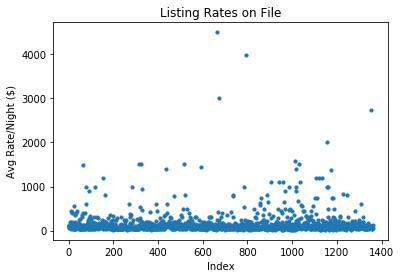

In [9]:
# Scatterplot of rates (for rate frequencies)
scatter(df.index, df['average_rate($)'], s=10)
xlabel('Index')
ylabel('Avg Rate/Night ($)')
title('Listing Rates on File') #We had incomplete data for 2017
# Three homes are at or above $3k. Quite a few are way above the population.
# Exclude anything above 2 stdev away from the mean for our analysis

1303


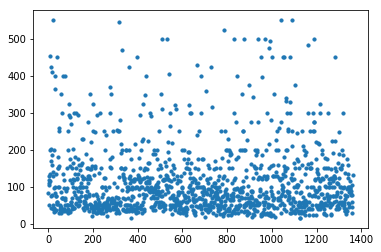

In [10]:
df2 = df[df['average_rate($)'] < 2*df.describe().iloc[2][1]] # trimmed
print(len(df2)) #1303 (61 got dropped)
scatter(df2.index, df2['average_rate($)'], s=10)

Text(0.5, 1.0, 'Frequency of Listing Rates')

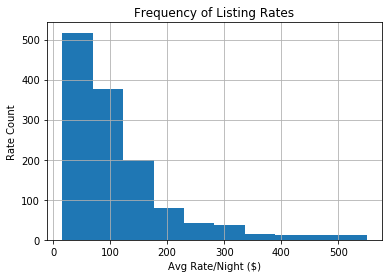

In [11]:
# Histogram of average rates, excluding those > 2 stdev
df2['average_rate($)'].hist()
xlabel('Avg Rate/Night ($)')
ylabel('Rate Count')
title('Frequency of Listing Rates')

## Trend and Seasonality Analysis

In [12]:
mask = df2['Listing Year'] != 2017

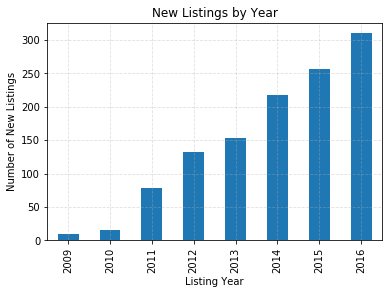

In [13]:
growth_austin = df2[mask]['Listing Year'].value_counts(ascending = True)
growth_austin.plot(kind = 'bar')
xlabel('Listing Year')
ylabel('Number of New Listings')
title('New Listings by Year')
plt.grid(alpha = 0.4, linestyle = '--')

In [14]:
g_factor = growth_austin.shift(-1)
growth_percent = ((g_factor - growth_austin)/growth_austin*100).shift(1).dropna()
dfGrowth = DataFrame(growth_percent)
dfGrowth['Year'] = dfGrowth.index.values

Text(0.5, 1.0, 'Annual Listing Growth in Percentage')

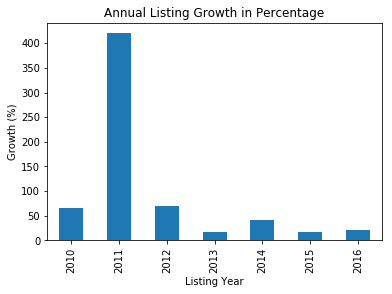

In [15]:
dfGrowth['Listing Year'].plot(kind = 'bar')
xlabel('Listing Year')
ylabel('Growth (%)')
title('Annual Listing Growth in Percentage')

Text(0.5, 1.0, 'Number of Listings by Month')

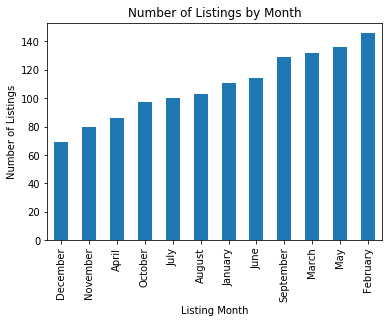

In [16]:
# Monthly listing difference
seasonal_listing = df2['Listing Month'].value_counts(ascending = True)
seasonal_listing.plot(kind = 'bar')
xlabel('Listing Month')
ylabel('Number of Listings')
title('Number of Listings by Month') # more postings in the beginning of the year

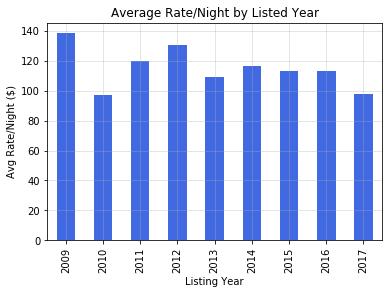

In [17]:
# Price increase (may not be representative as prices could change)
growth_price = df2.groupby('Listing Year')['average_rate($)'].mean()
growth_price.plot(kind ='bar', color = 'royalblue')
xlabel('Listing Year')
ylabel('Avg Rate/Night ($)')
title('Average Rate/Night by Listed Year') # more postings in the beginning of the year
plt.grid(alpha = 0.4)

## Neighborhood Analysis

In [18]:
# Heatmap

In [19]:
# Listing price and count by zip
zip_rate = df2.groupby(['Zipcode'])['average_rate($)'].agg(['count','mean'])
# zip_rate.sort_values(by='mean',ascending=False)
zip_rate.sort_values(by='count', ascending = True) # There are some zipcodes with only 1 or 2 listings
# 1's below: Dripping Springs, Sun City, Hutto | 2/3/5: Liberty Hill (clsoe to Georgetown), Jollyville, east East Austin
# Look at only zipcodes with > 30 listings

,count,mean
Zipcode,,
78620,1,135.000000
78628,1,350.000000
78634,1,280.000000
78642,1,150.000000
78726,3,249.000000
78717,3,50.000000
78721,5,90.600000
78739,6,134.166667
78747,6,41.333333


In [20]:
print(len(zip_rate)) #54 zip codes total
# sort_values(by='count',ascending=False)
mask = zip_rate['count'] >= 30
print(len(zip_rate[mask]))
sum(zip_rate[mask]['count'])

54
17


864

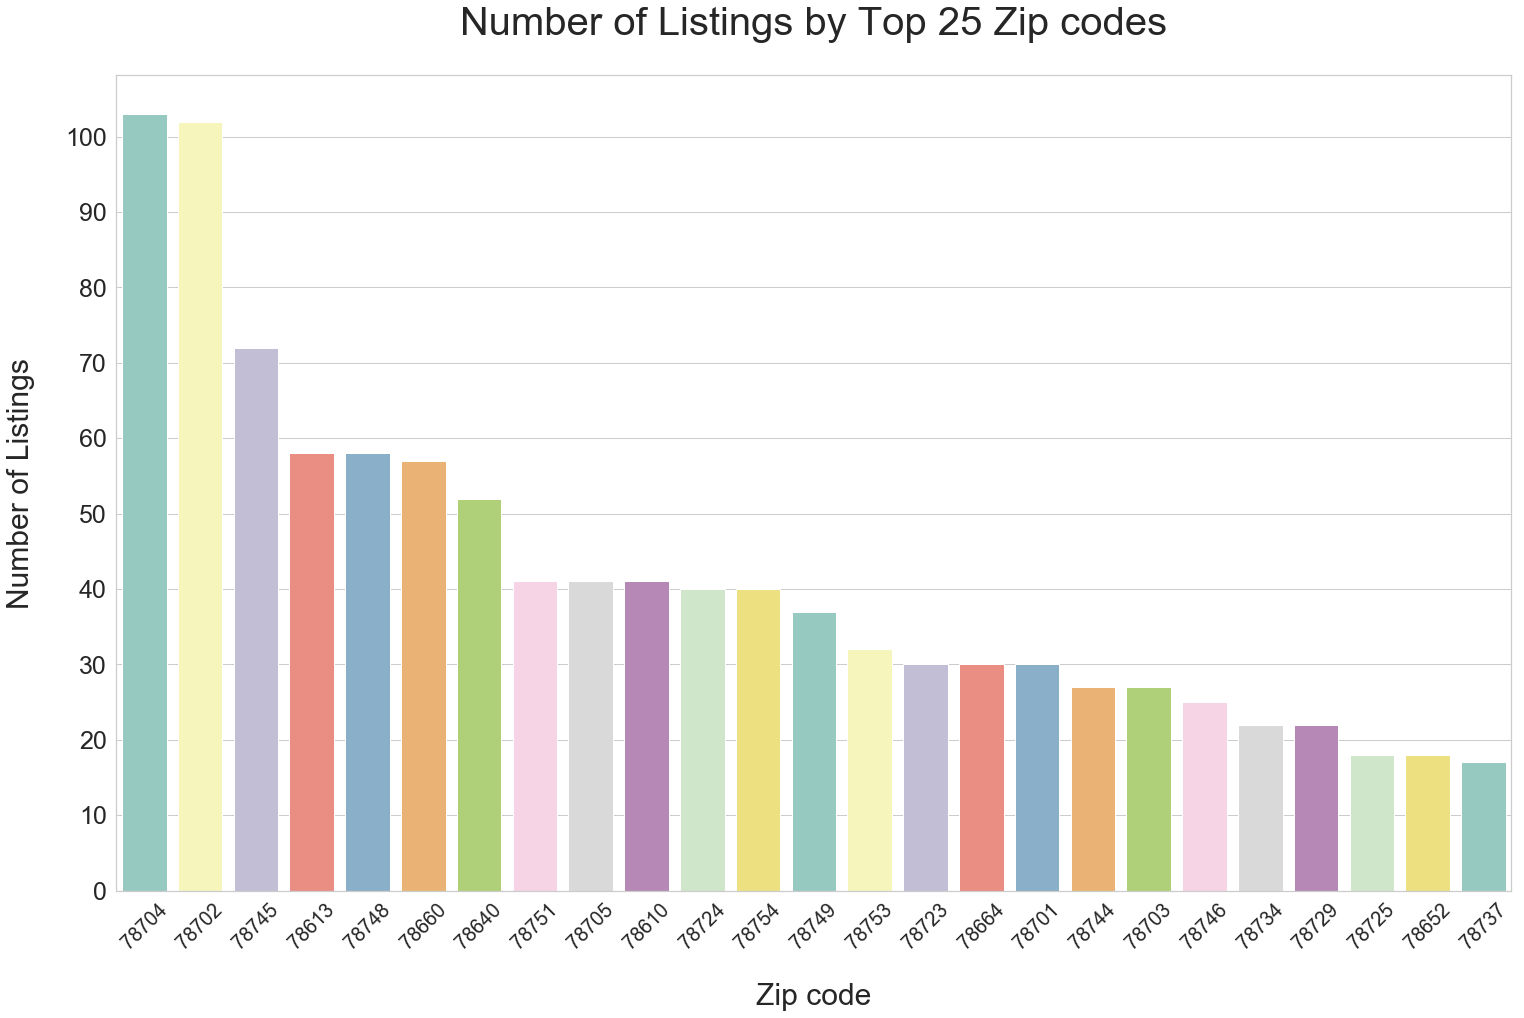

In [21]:
import matplotlib.ticker as ticker
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Number of Listings by Top 25 Zip codes",fontsize=40,pad=40)
ax = sns.countplot(x='Zipcode',data=df2, order = df2['Zipcode'].value_counts().iloc[:25].index, palette="Set3")
ax.set_xlabel('Zip code',fontsize=30,labelpad=30)
ax.set_ylabel('Number of Listings',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20, rotation = 45)
ax.yaxis.set_tick_params(labelsize=25)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

In [22]:
# Price by zipcode
df_avg_price = DataFrame(df2.groupby(['Zipcode'])['average_rate($)'].mean().reset_index())
# df_avg_price['Zipcode'] = df_avg_price['Zipcode'].astype(str)
top = df2['Zipcode'].value_counts().iloc[:17].index.tolist()
top_price = df_avg_price[df_avg_price['Zipcode'].isin(top)].sort_values('average_rate($)',ascending=False)[:17].reset_index()

## Price by Zip

In [23]:
top_zip_rate = zip_rate[mask].sort_values(by='mean',ascending = False).reset_index()
top_zip_rate[:2]

,Zipcode,count,mean
0,78701,30,173.966667
1,78610,41,146.170732


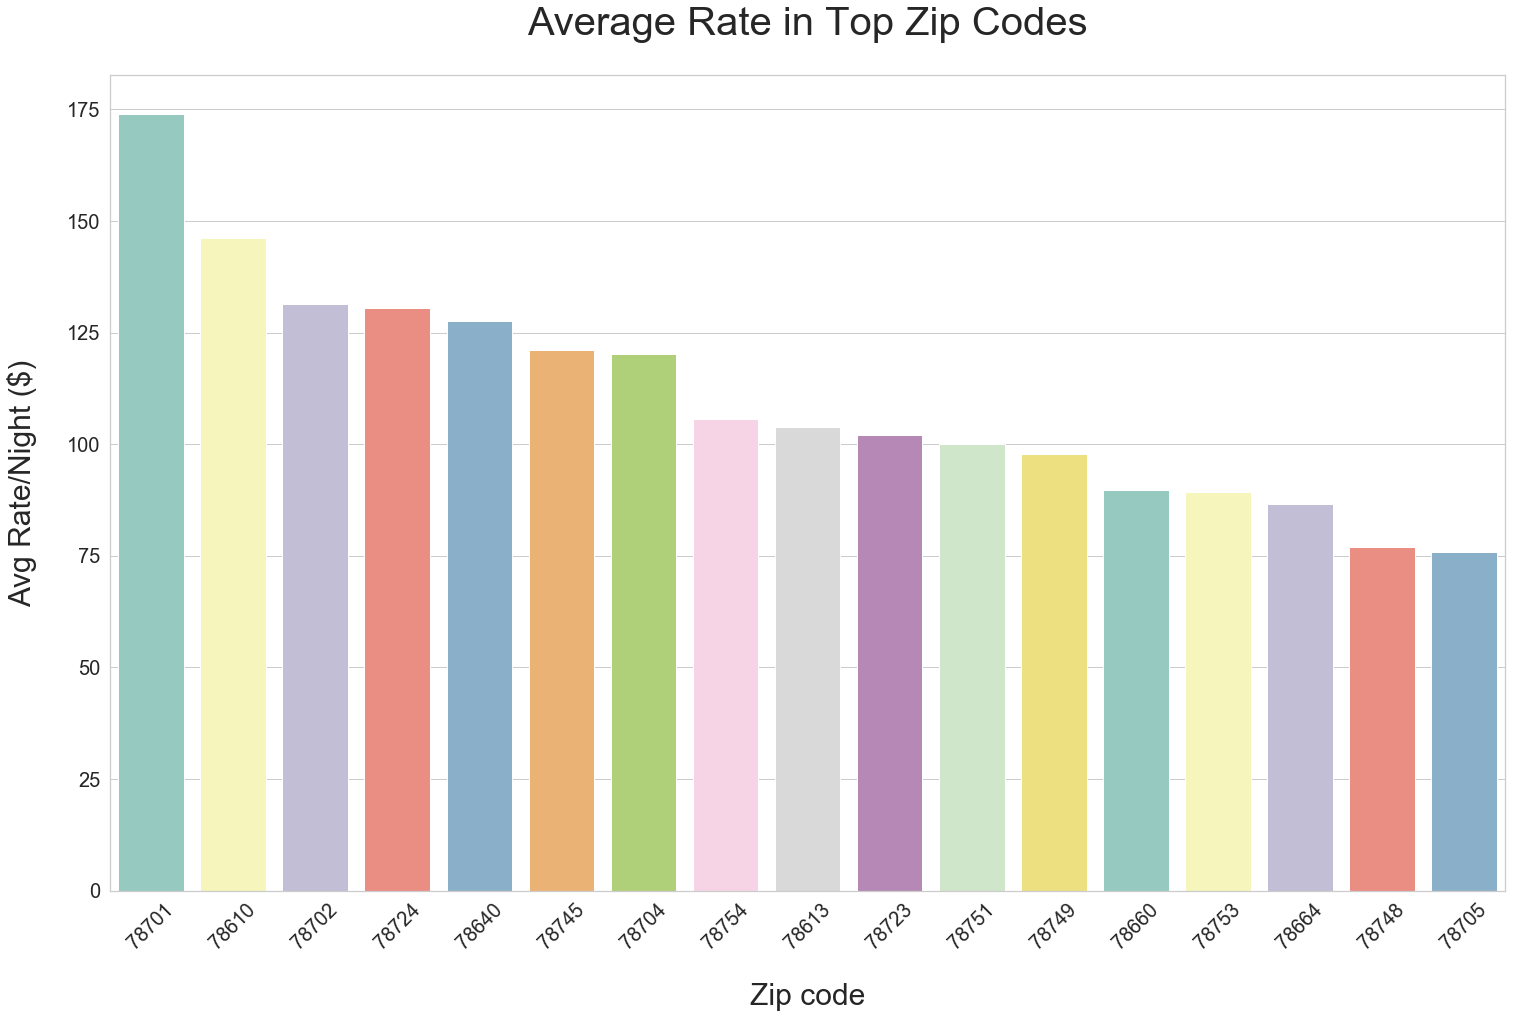

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Average Rate in Top Zip Codes",fontsize=40, pad=40)
ax = sns.barplot(x = top_zip_rate.index, y='mean',
                 data = top_zip_rate,
                 palette='Set3')
ax.set_xticklabels(top_zip_rate['Zipcode'])
ax.set_xlabel('Zip code',fontsize=30,labelpad=30)
ax.set_ylabel('Avg Rate/Night ($)',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20, rotation = 45)
ax.yaxis.set_tick_params(labelsize=20)

In [25]:
# Histograms of room rates and room numbers by zipcode
# import os

# def ziptojpeg (inputzip, df, outputpath):
#     """
#     ziptojpeg takes a zipcode and plots two histograms, one for average rates and another for the number of bedrooms
#     Args: 
#         inputzip (str): your desired zipcode
#         df (dataframe): the dataframe from which to extract data from
#         outputpath (str): the path to which to write the write
#     Returns:
#         writes to a jpeg file
#     """
#     # Pull the correct data from df
#     result = df[df['Zipcode'] == inputzip][['average_rate($)', 'num_of_bedrooms']]
#     print result.shape
#     # Write the result to a file
#     result.hist()
#     outputfile = os.path.join(outputpath, inputzip + ".jpeg")
#     plt.savefig(outputfile)

# for zipcode in set(df["Zipcode"]):
#     print "Working on ", zipcode
#     ziptojpeg(inputzip=zipcode, df=df2, outputpath='Rate_and_RmCount_Histograms')

In [26]:
df[:2]

,index,average_rate($),num_of_bedrooms,description_word_count,title_word_count,city,date_of_listing,description,title,url,Listing Month,Listing Year,Zipcode
0,0,82,2,29,6,Austin,15-Dec,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,December,2015,78751
1,1,110,1,42,4,Austin,15-Sep,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,September,2015,78704


## Word Count Analysis
**Not Really Useful**

In [27]:
# Title word count on price; can include this in a regression model
titlecount_rate = df2.groupby('title_word_count')['average_rate($)'].agg(['count','mean'])
titlecount_rate

,count,mean
title_word_count,,
1,5,247.400000
2,59,98.440678
3,118,123.779661
4,199,112.467337
5,264,106.943182
6,247,121.748988
7,179,105.402235
8,119,111.781513
9,78,122.717949


In [28]:
# description word count on price
descriptioncount_rate = df2.groupby('description_word_count')['average_rate($)'].agg(['count','mean'])
descriptioncount_rate.sort_values(by='mean',ascending=False)

,count,mean
description_word_count,,
104,1,300.000000
110,1,295.000000
103,1,250.000000
254,1,219.000000
1,2,212.500000
147,1,195.000000
99,2,187.500000
90,5,184.800000
51,16,179.812500


# Text Analysis on Description

In [29]:
# Steps: split on description, stop words, count words, find top 10 words, then find in descriptions
# import stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# split description
import re
def words_from_description(description):
    """
    words_from_description splits words from the given string into a list of words
    args:
        description (string): one string object that user would like to split into words
    returns:
        a list of words
    """
    prelimsplitwords = re.split('\W+', description.lower()) #splits by anything that's not [a_zA_Z0-9_] and removes punctuations
    splitwords = [word for word in prelimsplitwords if word not in stop_words and word != ""] #stop words and remove empty string
    # Do we need to deal with \n? doesn't seem like it...
    return splitwords

print(words_from_description("*Not an actual Treehouse\n\nWelcome to my spacious 1 bedroom apartment located on the 2nd floor. Huge windows, a working fireplace, laminate hardwood floors, wifi, and a comfortable queen size bed are just a few perks this great space offers. I offer a self check-in so you are welcome to arrive anytime after the check-in time that's convenient for you.")) # sample execution

['actual', 'treehouse', 'welcome', 'spacious', '1', 'bedroom', 'apartment', 'located', '2nd', 'floor', 'huge', 'windows', 'working', 'fireplace', 'laminate', 'hardwood', 'floors', 'wifi', 'comfortable', 'queen', 'size', 'bed', 'perks', 'great', 'space', 'offers', 'offer', 'self', 'check', 'welcome', 'arrive', 'anytime', 'check', 'time', 'convenient']


In [31]:
# create a dictionary with descriptions and split words
import collections
description_dict = {}
# go through all quotes, key:dictionary{word:counter}
for description in df2['description']: 
    description_dict[description] = {}
    word = words_from_description(description)
    word_count = collections.Counter(word)
    description_dict[description] = word_count

In [32]:
# Create a dictionary of description dict's words for counts
word_count_dict = {}
for key in description_dict: 
    words = words_from_description(key)
    for word in words:
        if word not in word_count_dict:
            word_count_dict[word] = 0

**THIS ONE TAKES >= 5MIN!**

In [33]:
#update the dictionary set up above with word count
for key in word_count_dict: 
    for sentence_key in description_dict:
        words = words_from_description(sentence_key)
        if key in words:
            matches = [i for i in words if i == key] 
            word_count_dict[key] += len(matches)

In [34]:
len(word_count_dict) # these are across 1300 listings

5192

In [35]:
# word_count_dict

In [36]:
sorted_word_count = sorted(word_count_dict.items(), key=lambda x: x[1], reverse = True)
sorted_word_count[25:86]

[('park', 217),
 ('two', 211),
 ('great', 211),
 ('queen', 210),
 ('away', 205),
 ('space', 203),
 ('enjoy', 202),
 ('street', 199),
 ('business', 190),
 ('location', 182),
 ('south', 182),
 ('bath', 178),
 ('travelers', 178),
 ('10', 178),
 ('love', 175),
 ('area', 174),
 ('5', 173),
 ('15', 168),
 ('good', 163),
 ('large', 160),
 ('couples', 159),
 ('beautiful', 158),
 ('coffee', 157),
 ('pool', 156),
 ('new', 154),
 ('living', 153),
 ('walking', 153),
 ('apartment', 152),
 ('perfect', 152),
 ('lake', 149),
 ('solo', 148),
 ('easy', 147),
 ('stay', 147),
 ('walk', 146),
 ('available', 146),
 ('3', 144),
 ('comfortable', 140),
 ('parking', 140),
 ('east', 137),
 ('adventurers', 137),
 ('shopping', 136),
 ('distance', 136),
 ('size', 134),
 ('texas', 131),
 ('drive', 130),
 ('guest', 126),
 ('clean', 121),
 ('also', 121),
 ('min', 121),
 ('airport', 120),
 ('center', 120),
 ('bus', 119),
 ('guests', 119),
 ('tv', 118),
 ('cozy', 116),
 ('city', 115),
 ('20', 114),
 ('well', 112),
 ('ba

# Modeling
1. Manually take out words to use as our extra columns (15): Austin, DT, home, private, place, room, bed, minutes, house, close, neighborhood, bedroom, 
2. Convert Zipcodes and key words as categorical variables
3. Conduct a TF-IDF analysis to add additional features
4. Model: regression

In [38]:
# From top 20
top_key_words = ['kitchen', 'downtown', 'home', 'private', 'place', 
             'room', 'bed', 'minutes', 'house', 'close', 
             'neighborhood','bedroom', 'quiet', 'restaurants',]
# "medium-used" (still > 100) interesting key words
interesting_key_words = ['pool', 'airport', 'love', 'coffee', 'couples',
                        'business','walking','comfortable', 'modern']

In [39]:
import statsmodels.api as sm
from patsy import dmatrices
df2 = df2.rename(columns={'average_rate($)':'rate'})
zip_rate = df2.groupby(['Zipcode'])['rate'].agg(['count','mean'])
mask = zip_rate['count'] >= 30
TopZip = zip_rate[mask].reset_index()['Zipcode']
mask = (df2['Zipcode'].isin(TopZip))
df2 = df2[mask]

df3 = pd.get_dummies(df2,columns=['Zipcode'])
df3.shape

df3 = df3.reset_index()
df3 = df3.drop('index',axis=1)

## TF-IDF Analysis
What words have the highest scores?

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df=30) # 50 for merging; 30 for picking
X = vectorizer.fit_transform(df3['description'])
idf = vectorizer.idf_
tfidf_dict = dict(zip(vectorizer.get_feature_names(), idf))

In [41]:
print(len(vectorizer.vocabulary_),len(vectorizer.idf_))
# 4279 - 4045 after stop words; - 289 after minimizing at 20; 184 after 30; 94 after 50

184 184


In [42]:
# Attempt to merge the df - but too many columns; manually choose words
# df_tfidf = DataFrame(X.toarray())
# df_tfidf.columns = vectorizer.vocabulary_
# len(df_tfidf)
# # df_tfidf.to_csv('CSV/df_tfidf.csv', index = False)

# # level_0
# df3 = df3.reset_index()
# df_tfidf = df_tfidf.reset_index()
# df3[:5]
# df_3andtfidf = pd.concat([df3, df_tfidf])

# df3 = df3.merge(df_tfidf, on = "index")

In [43]:
sorted_tfidf_dict = sorted(tfidf_dict.items(), key=lambda kv: kv[1], reverse = True)
sorted_tfidf_dict #find keywords here

[('bird', 4.328742302446733),
 ('breakfast', 4.328742302446733),
 ('dell', 4.328742302446733),
 ('furnished', 4.328742302446733),
 ('included', 4.328742302446733),
 ('property', 4.328742302446733),
 ('sleeps', 4.328742302446733),
 ('want', 4.328742302446733),
 ('americas', 4.296993604132153),
 ('cable', 4.296993604132153),
 ('comfortably', 4.296993604132153),
 ('includes', 4.296993604132153),
 ('lots', 4.296993604132153),
 ('shared', 4.296993604132153),
 ('entrance', 4.266221945465399),
 ('food', 4.266221945465399),
 ('grocery', 4.266221945465399),
 ('kids', 4.266221945465399),
 ('nice', 4.266221945465399),
 ('relax', 4.266221945465399),
 ('relaxing', 4.266221945465399),
 ('remodeled', 4.266221945465399),
 ('ride', 4.266221945465399),
 ('rooms', 4.266221945465399),
 ('trails', 4.266221945465399),
 ('views', 4.266221945465399),
 ('air', 4.236368982315717),
 ('bike', 4.236368982315717),
 ('sized', 4.236368982315717),
 ('st', 4.236368982315717),
 ('convenient', 4.207381445442466),
 ('conv

In [45]:
tf_idf_words = ['sleeps', 'furnished', 'breakfast', 'remodeled','trails',
               'cable','views','bike','domain','rainey','washer']

Side note: If we had longer, more complex regex and bigger datasets, use
wordmatch = re.compile("\W"+ "word"+ "\W")
pattern.search(string) --> wordmatch.search(description)

In [46]:
# Build keyword dummy variables
import re
for word in top_key_words:
    df3[word] = df3['description'].map(lambda description: 0 if re.search(r'\W' + word + r'\W', 
                                                                          description.lower()) is None else 1)

for word in interesting_key_words:
    df3[word] = df3['description'].map(lambda description: 0 if re.search(r'\W' + word + r'\W', 
                                                                          description.lower()) is None else 1)
    
for word in tf_idf_words:
    df3[word] = df3['description'].map(lambda description: 0 if re.search(r'\W' + word + r'\W', 
                                                                          description.lower()) is None else 1)

In [47]:
df3[:2]

,level_0,rate,num_of_bedrooms,description_word_count,title_word_count,city,date_of_listing,description,title,url,...,furnished,breakfast,remodeled,trails,cable,views,bike,domain,rainey,washer
0,0,82,2,29,6,Austin,15-Dec,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,...,0,0,0,0,0,0,0,0,0,0
1,1,110,1,42,4,Austin,15-Sep,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,...,0,0,0,0,1,0,0,0,0,0


In [48]:
df3 = df3.drop(['level_0','city','date_of_listing','description','Listing Month','Listing Year','title','url'],axis=1)
df3.columns.values

array(['rate', 'num_of_bedrooms', 'description_word_count',
       'title_word_count', 'Zipcode_78610', 'Zipcode_78613',
       'Zipcode_78640', 'Zipcode_78660', 'Zipcode_78664', 'Zipcode_78701',
       'Zipcode_78702', 'Zipcode_78704', 'Zipcode_78705', 'Zipcode_78723',
       'Zipcode_78724', 'Zipcode_78745', 'Zipcode_78748', 'Zipcode_78749',
       'Zipcode_78751', 'Zipcode_78753', 'Zipcode_78754', 'kitchen',
       'downtown', 'home', 'private', 'place', 'room', 'bed', 'minutes',
       'house', 'close', 'neighborhood', 'bedroom', 'quiet',
       'restaurants', 'pool', 'airport', 'love', 'coffee', 'couples',
       'business', 'walking', 'comfortable', 'modern', 'sleeps',
       'furnished', 'breakfast', 'remodeled', 'trails', 'cable', 'views',
       'bike', 'domain', 'rainey', 'washer'], dtype=object)

In [49]:
df3[:2]

,rate,num_of_bedrooms,description_word_count,title_word_count,Zipcode_78610,Zipcode_78613,Zipcode_78640,Zipcode_78660,Zipcode_78664,Zipcode_78701,...,furnished,breakfast,remodeled,trails,cable,views,bike,domain,rainey,washer
0,82,2,29,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,110,1,42,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Multi-Linear Regression

In [50]:
all_column_names = df3.columns.values[1:]
formula = 'rate ~ {}'.format(' + '.join(['Q("{}")'.format(x) for x in all_column_names]))
y, X = dmatrices(formula,df3,return_type='dataframe')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_train = sm.OLS(y_train, X_train)
result_train = model_train.fit()
print(result_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     15.11
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.18e-81
Time:                        09:54:02   Log-Likelihood:                -3809.8
No. Observations:                 691   AIC:                             7728.
Df Residuals:                     637   BIC:                             7973.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [51]:
from sklearn.linear_model import LinearRegression
model2_train = LinearRegression().fit(X_train,y_train)
predict_results = model2_train.predict(X_test)

y_test_values = y_test['rate'].values.astype(int)

SE = (predict_results-y_test_values)

for i in range(len(SE)):
    SE[i]= SE[i]**2
    
MSE = mean(SE)
RMSE = sqrt(MSE)

print('The RMSE of our model is',RMSE)
# Taking all the key words out actually don't impact the performance at all - still $111
# the descriptions don't change your listings, but if they indicate a specific amenity (e.g., pool), it may

The RMSE of our model is 111.46854895257601


In [53]:
print(zip(predict_results, y_test_values))
# We're bad at predicting lower-priced listings

## Rerun OLS 
with only significant features

In [54]:
df2 = df2.rename(columns={'average_rate($)':'rate'})
zip_rate = df2.groupby(['Zipcode'])['rate'].agg(['count','mean'])
mask = zip_rate['count'] >= 30
TopZip = zip_rate[mask].reset_index()['Zipcode']
mask = (df2['Zipcode'].isin(TopZip))
df2 = df2[mask]

df3 = pd.get_dummies(df2,columns=['Zipcode'])
df3.shape

df3 = df3.reset_index()
df3 = df3.drop('index',axis=1)

In [55]:
sig_keywords = ['house','room','pool','modern']
for word in sig_keywords:
    df3[word] = df3['description'].map(lambda description: 0 if re.search(r'\W' + word + r'\W', 
                                                                          description.lower()) is None else 1)

In [56]:
df3[:2]

,level_0,rate,num_of_bedrooms,description_word_count,title_word_count,city,date_of_listing,description,title,url,...,Zipcode_78745,Zipcode_78748,Zipcode_78749,Zipcode_78751,Zipcode_78753,Zipcode_78754,house,room,pool,modern
0,0,82,2,29,6,Austin,15-Dec,"Cute two bedroom with lots of windows, sunny b...",Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...,...,0,0,0,1,0,0,0,0,0,0
1,1,110,1,42,4,Austin,15-Sep,Comfortable Traditional Interior Furniture in ...,Fabulous Central Austin Condo!,https://www.airbnb.com/rooms/13571814?location...,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df3 = df3.drop(['level_0','city','description_word_count','date_of_listing','description','Listing Month','Listing Year','title','url',
               'Zipcode_78610','Zipcode_78613','Zipcode_78640','Zipcode_78705',
               'Zipcode_78723','Zipcode_78724','Zipcode_78745','Zipcode_78749',
               'Zipcode_78751','Zipcode_78753','Zipcode_78754'],axis=1)
df3.columns.values

array(['rate', 'num_of_bedrooms', 'title_word_count', 'Zipcode_78660',
       'Zipcode_78664', 'Zipcode_78701', 'Zipcode_78702', 'Zipcode_78704',
       'Zipcode_78748', 'house', 'room', 'pool', 'modern'], dtype=object)

In [58]:
all_column_names = df3.columns.values[1:]
formula = 'rate ~ {}'.format(' + '.join(['Q("{}")'.format(x) for x in all_column_names]))
y, X = dmatrices(formula,df3,return_type='dataframe')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_train = sm.OLS(y_train, X_train)
result_train = model_train.fit()
print(result_train.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     64.04
Date:                Thu, 03 Oct 2019   Prob (F-statistic):          4.65e-103
Time:                        09:55:36   Log-Likelihood:                -3829.3
No. Observations:                 691   AIC:                             7685.
Df Residuals:                     678   BIC:                             7744.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                37.92

In [60]:
model2_train = LinearRegression().fit(X_train,y_train)
predict_results = model2_train.predict(X_test)

y_test_values = y_test['rate'].values.astype(int)

SE = (predict_results-y_test_values)

for i in range(len(SE)):
    SE[i]= SE[i]**2
    
MSE = mean(SE)
RMSE = sqrt(MSE)

print('The RMSE of our model is',RMSE)
# We're lacking a lot of features of a listing

The RMSE of our model is 109.9301270670882
